In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB

In [20]:
data_path = ('amazon_cells_labelled (1).txt')

In [21]:
amazon = pd.read_csv(data_path, sep= '\t', header=None)

In [22]:
amazon.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [23]:
amazon.columns = ['Comment', 'ranking']

In [24]:
keywords = ['plug', 'charger', 'phone', 'purchase', 'price', 'quality', 'great']

for key in keywords:
    amazon[str(key)] = amazon.Comment.str.contains(' ' + str(key) + ' ', case=False)

The purpose of using these keywords is to determine which were the common trends in the positive and negative comments. These will indicate what exactly consumers like or dislike about the amazon products.

In [27]:
amazon['ranking'] = (amazon['ranking'] == 1)

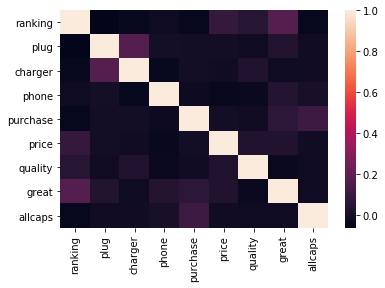

In [32]:
sns.heatmap(amazon.corr())

The chart up demonstrates the words are independent of one another.

In [31]:
data = amazon[keywords]
target = amazon['ranking']

In [33]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

In [34]:
print('Number of mislabled points out of a total {} points : {}'.format(data.shape[0], (target != y_pred).sum()))

Number of mislabled points out of a total 1000 points : 454
